# =======================================
# HEART DISEASES DATASET EXPLORATORY DATA ANALYSIS
# =======================================

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder


DATASET: 
Kaggle Heart Diseases Dataset

ABOUT: 
The Kaggle Heart Disease dataset contains patient data with features like age, sex, blood pressure, and cholesterol. The target is a binary indicator of heart disease, making it ideal for exploring distributions, correlations, and classification tasks.

QUESTIONS TO ANSWER:
1. What factors are most strongly associated with heart disease?    
2. What sex in more common to have heart disease
4. Is the dataset linearly separable, or are some disease cases inherently ambiguous?


In [2]:
# Load data
df = pd.read_csv('heart_disease_dataset.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### =============================================
### 2. DATA OVERVIEW
### =============================================

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


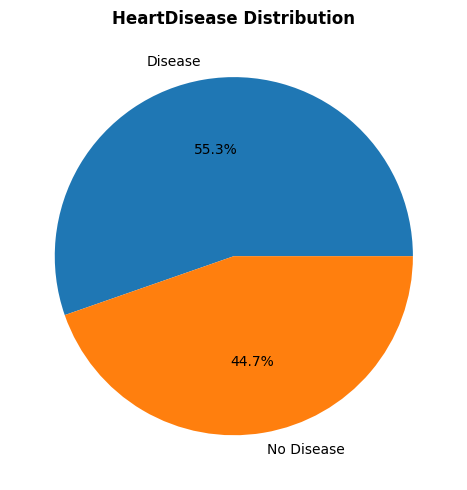

In [7]:
counts = df['HeartDisease'].value_counts()

label_map = {0: "No Disease", 1: "Disease"}
labels = [label_map[i] for i in counts.index]

plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title("HeartDisease Distribution", weight='bold')
plt.savefig('plots/1pie_heartDisease_dist.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

### =============================================
### 3. Data Cleaning
### =============================================

In [8]:
missing_values = df.isnull().sum()
display(missing_values)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
columns = df.columns.to_list()

object_cols = df.select_dtypes(include='object').columns.to_list()
object_cols.remove('ST_Slope') #We will one-hot encode this
object_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']

In [10]:
names = ['Sex','ChestPainType','RestingECG','ExerciseAngina']
for n, o in zip(names, object_cols):    
    ChestPainType_unique = df[o].unique()
    print(f"|{n}| unique values: {ChestPainType_unique}")

|Sex| unique values: ['M' 'F']
|ChestPainType| unique values: ['ATA' 'NAP' 'ASY' 'TA']
|RestingECG| unique values: ['Normal' 'ST' 'LVH']
|ExerciseAngina| unique values: ['N' 'Y']


In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,Up,0
1,49,0,1,160,180,0,0,156,0,1.0,Flat,1
2,37,1,2,130,283,0,1,98,0,0.0,Up,0
3,48,0,0,138,214,0,0,108,1,1.5,Flat,1
4,54,1,1,150,195,0,0,122,0,0.0,Up,0


In [12]:
sex_map = {'M': 1, 'F': 0}
chestPainType_map = {'ASY': 0, 'NAP': 1, 'ATA':2, 'TA': 3}
restingECG_map = {'Normal': 0, 'ST': 1, 'LVH':2}
exerciseAngina_map = {'N': 0, 'Y': 1}

maps = [sex_map, chestPainType_map, restingECG_map, exerciseAngina_map]

for m, col in zip(maps, object_cols):
    df[col] = df[col].map(m)

In [14]:
encoder = OneHotEncoder(sparse_output=False)
encoded_stSlope = encoder.fit_transform(df[['ST_Slope']])

encoded_stSlope = pd.DataFrame(encoded_stSlope, columns=encoder.get_feature_names_out(['ST_Slope']))
df = df.drop('ST_Slope', axis=1).join(encoded_stSlope)


In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,2,140,289,0,0,172,0,0.0,0,0.0,0.0,1.0
1,49,0,1,160,180,0,0,156,0,1.0,1,0.0,1.0,0.0
2,37,1,2,130,283,0,1,98,0,0.0,0,0.0,0.0,1.0
3,48,0,0,138,214,0,0,108,1,1.5,1,0.0,1.0,0.0
4,54,1,1,150,195,0,0,122,0,0.0,0,0.0,0.0,1.0


### =============================================
### 4. EXPLORATORY DATA ANALYSIS
### =============================================

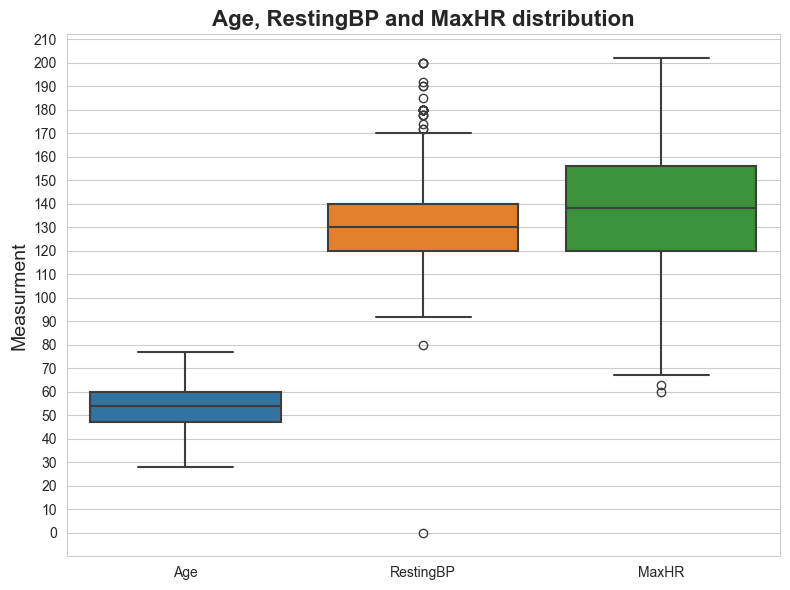

In [16]:
features = df[['Age', 'RestingBP', 'MaxHR']]
sns.set_style("whitegrid")


plt.figure(figsize=(8,6))
plt.yticks(range(0, int(features.max().max()) + 10, 10))
sns.boxplot(features, linewidth=1.5)
plt.title("Age, RestingBP and MaxHR distribution", fontsize=16, fontweight='bold')
plt.ylabel("Measurment", fontsize=14)
plt.tight_layout()
plt.savefig('plots/2_bp_dist', dpi=300, bbox_inches='tight')
plt.show()

In this graph we can see distribution of Age and RestingBP features from dataset.

1. Age - blue box
    - Median age is around 55
    - Most of person recorded in this dataset is ranged (Interquartile Range) from age 48 - 60
    - Whiskers show that there are also people from roughly 27 up to 76 of age
    - We dont see any outliers

2. RestingBP - orange box (Resting blood pressure measured in mmHg)
    - Median resting blood presure measured in mmHg is 130
    - Interquartile range is from 120 - 140
    - Highest restingBp that is not considered as outlier is 170 and lowest is roughly 92
    - We see most of outliers above 170 RestingBP, this could mean that these patients have RestingBP that could not be considered as healthy and at 80 RestingBP we also see one outlier
    - The "0" value is not realistic for blood pressure → this is almost certainly missing data or incorrect entry which we will remove

3. MaxHR - green box (Maximum heart rate achieved during exercise.)
    - meidan of MaxHR is roughly 138
    - Interquartile range is from 120 - 156
    - Non outlier range is roughly from 68 - 200
    - 2 outliers below range 68

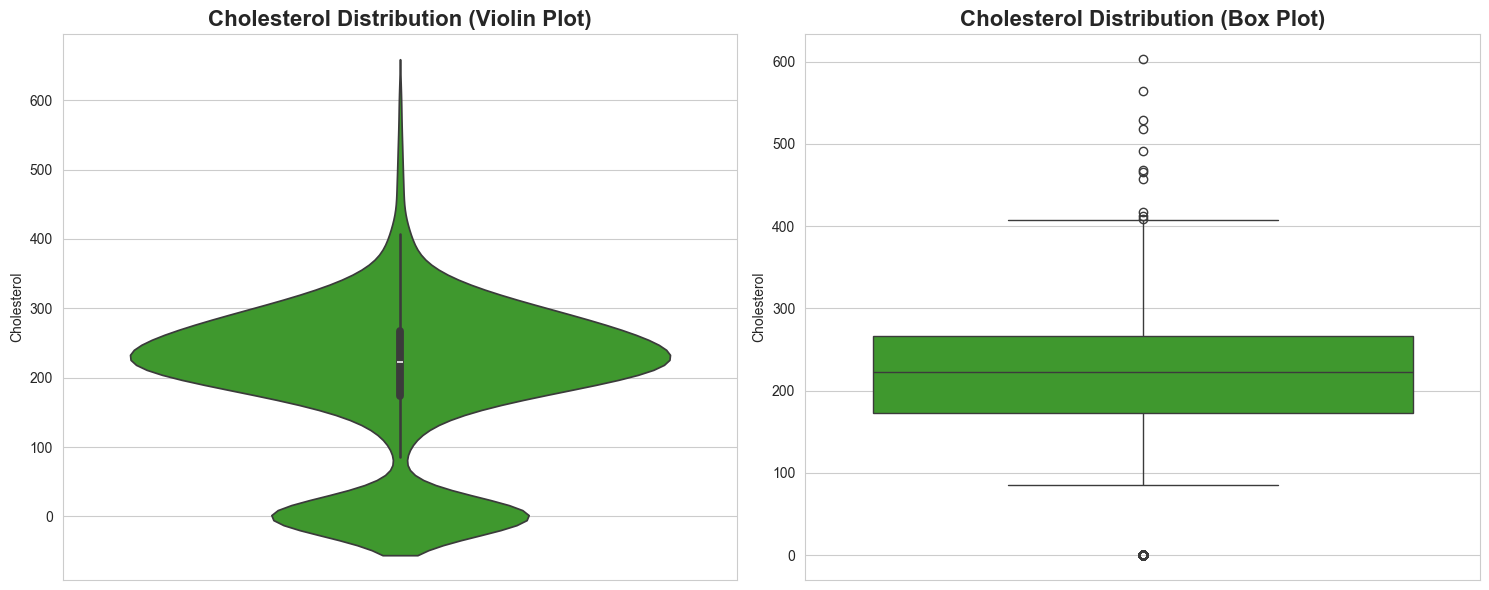

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.violinplot(y=df['Cholesterol'], color="#33AA1C", ax=axes[0])
axes[0].set_title("Cholesterol Distribution (Violin Plot)", fontsize=16, fontweight='bold')


features = ['Age', 'RestingBP']
sns.boxplot(df['Cholesterol'], ax=axes[1], color="#33AA1C")
axes[1].set_title("Cholesterol Distribution (Box Plot)", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/3_cholesterol_dist', dpi=300, bbox_inches='tight')
plt.show()

- In these cholesterol distribution plots we can see distribution of Cholesterol variable
- The violin plot clearly shows a bimodal distribution, meaning the data has two main clusters or peaks, one of which i around value 0 which is clearly unusual for cholesterol
- We checked it also in boxplot and we confirm that there are few outliers on value 0 which is not realistic for cholesterol. This is almost certainly missing data or incorrect entry which we will remove as well as outlier from RestingBP variable
- As we continue we look at main cluster in violin plot. A large, central peak exists roughly between 150 and 300. This represents the majority of the measured cholesterol values.
- The cholesterol value extends up to about 630 which is highest outlier

In [18]:
# Removing incorrect outlier
incorrect_val1 = df[(df['RestingBP'] == 0)].index
df.drop(incorrect_val1, axis=0, inplace=True)

In [19]:
incorrect_val2 = df[df['Cholesterol'] == 0].index
incorrect_val2

Index([293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
       ...
       481, 483, 484, 492, 508, 514, 515, 518, 535, 536],
      dtype='int64', length=171)

- As we see there are 171 rows with cholesterol value 0, which is too much data for deleting, so we will impute them with median

In [20]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())

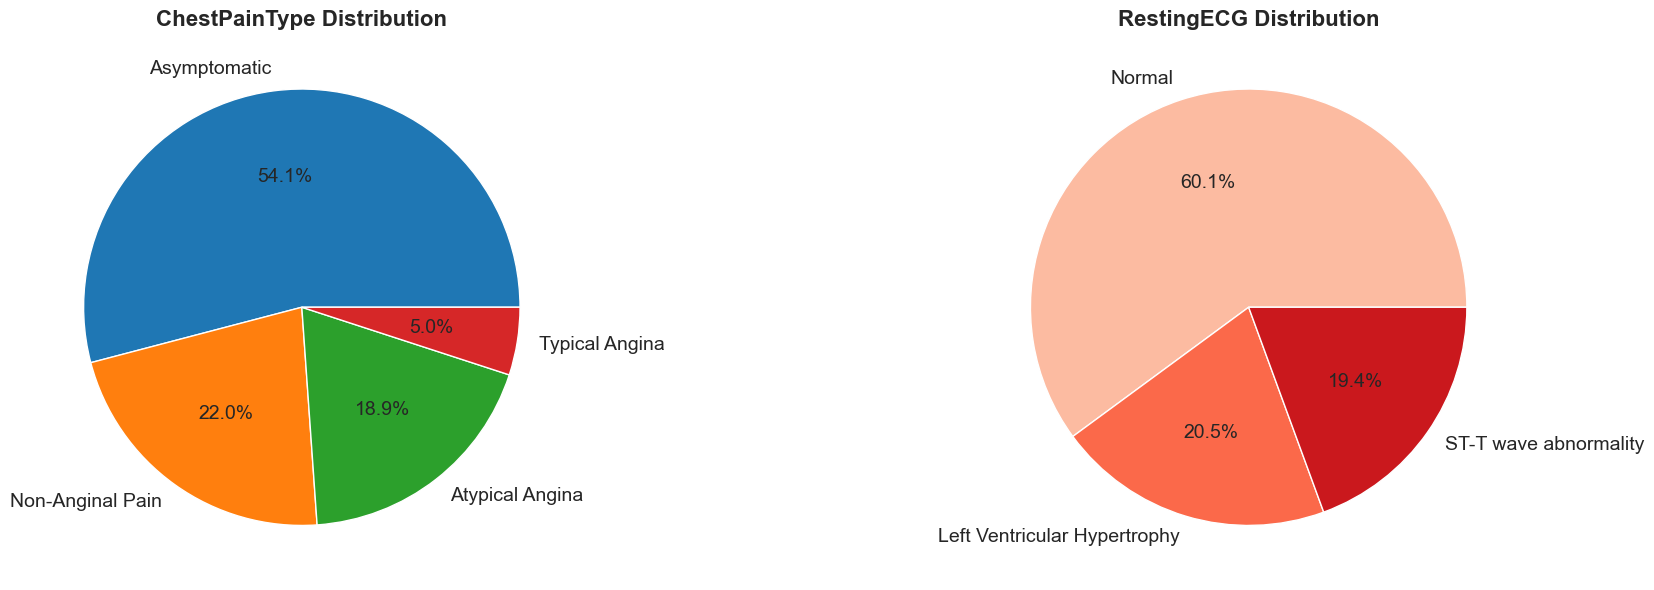

In [21]:
ChestPainType_counts = df['ChestPainType'].value_counts()
RestingECG_counts = df['RestingECG'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))


custom_labels = ['Asymptomatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina']
axes[0].pie(ChestPainType_counts, autopct='%1.1f%%', labels=custom_labels, textprops={'fontsize': 14})
axes[0].set_title("ChestPainType Distribution", fontsize=16, fontweight='bold')


num_slices = len(RestingECG_counts)
palette = sns.color_palette('Reds', num_slices)

custom_labels = ['Normal', 'Left Ventricular Hypertrophy', 'ST-T wave abnormality']
axes[1].pie(RestingECG_counts, autopct='%1.1f%%', labels=custom_labels, textprops={'fontsize': 14}, colors=palette)
axes[1].set_title("RestingECG Distribution", fontsize=16, fontweight='bold')


plt.tight_layout()
plt.savefig('plots/4_pies', dpi=300, bbox_inches='tight')
plt.show()

- Here we have 2 pie's showing distribution of ChestPainType and Resting ECG variables
- Most of patients have Asymptomatic (lowest chest pain) and Resting electrocardiogram result (RestingECG) in normal
- 5% has Typical Angina type of chest pain (biggest chest pain) and 20.5% has Left Ventricular Hypertrophy (Represents a significant structural change)

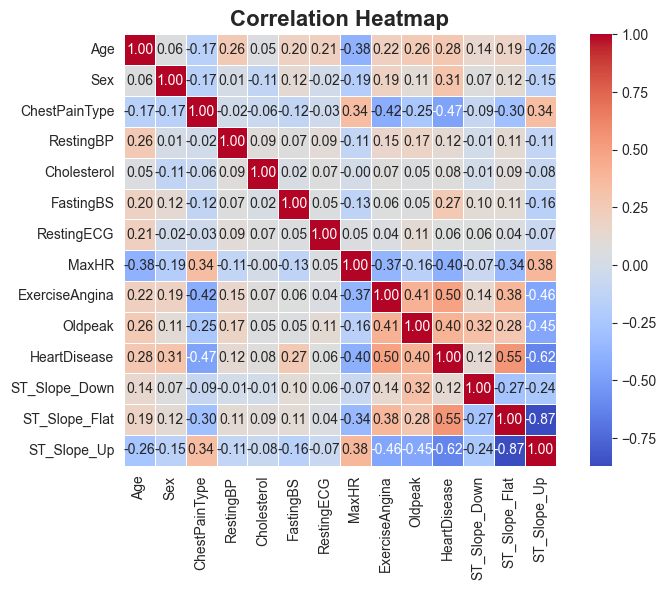

In [25]:
#corr_features = df.drop(columns=['ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'])
corr_map = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_map, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('plots/5_corr_map', dpi=300, bbox_inches='tight')
plt.show()

- Key observations from this correlation map:
    1. ExerciseAngina and Heart Disease +0.50 - A moderate to strong positive correlation. Exercise-induced angina (chest pain during exercise) is strongly associated with the presence of Heart Disease.
    2. HeartDisease and ST_Slope_Flat: +0.55 - Flat ST slope is one of the strongest predictors of heart disease.
    3. HeartDisease and MaxHR (negative): –0.40 - Lower maximum heart rate during exercise is linked to heart disease.
    4. MaxHR and Age: –0.38 - Older people achieve lower max heart rates

C:\Users\MSI\AppData\Local\Temp\ipykernel_12860\2559828761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette=colors)


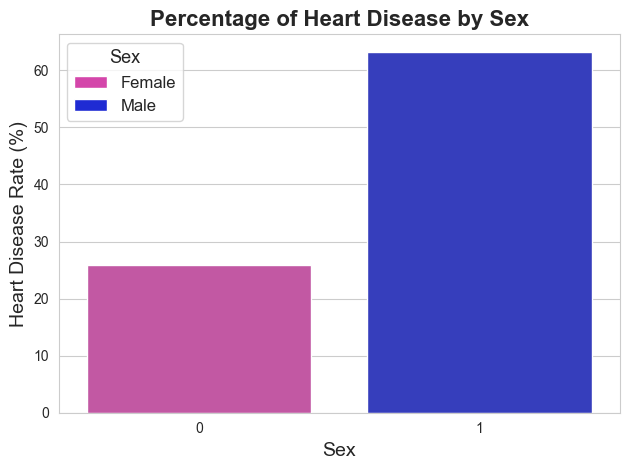

In [26]:
rates = df.groupby('Sex')['HeartDisease'].mean() * 100
colors = ["#D446AA", "#1F2BD3"] 

sns.barplot(x=rates.index, y=rates.values, palette=colors)


from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[0], label='Female'),
                   Patch(facecolor=colors[1], label='Male')]

plt.legend(handles=legend_elements, title='Sex', fontsize=12, title_fontsize=13)

plt.title("Percentage of Heart Disease by Sex", fontsize=16, fontweight='bold')
plt.ylabel("Heart Disease Rate (%)", fontsize=14)
plt.xlabel("Sex", fontsize=14)
plt.tight_layout()
plt.savefig('plots/6_sex_percentage', dpi=300, bbox_inches='tight')
plt.show()

- Male Risk is Higher: The bar for Male shows a heart disease rate of approximately 63%.
- Female Risk is Lower: The bar for Female shows a heart disease rate of approximately 26%.


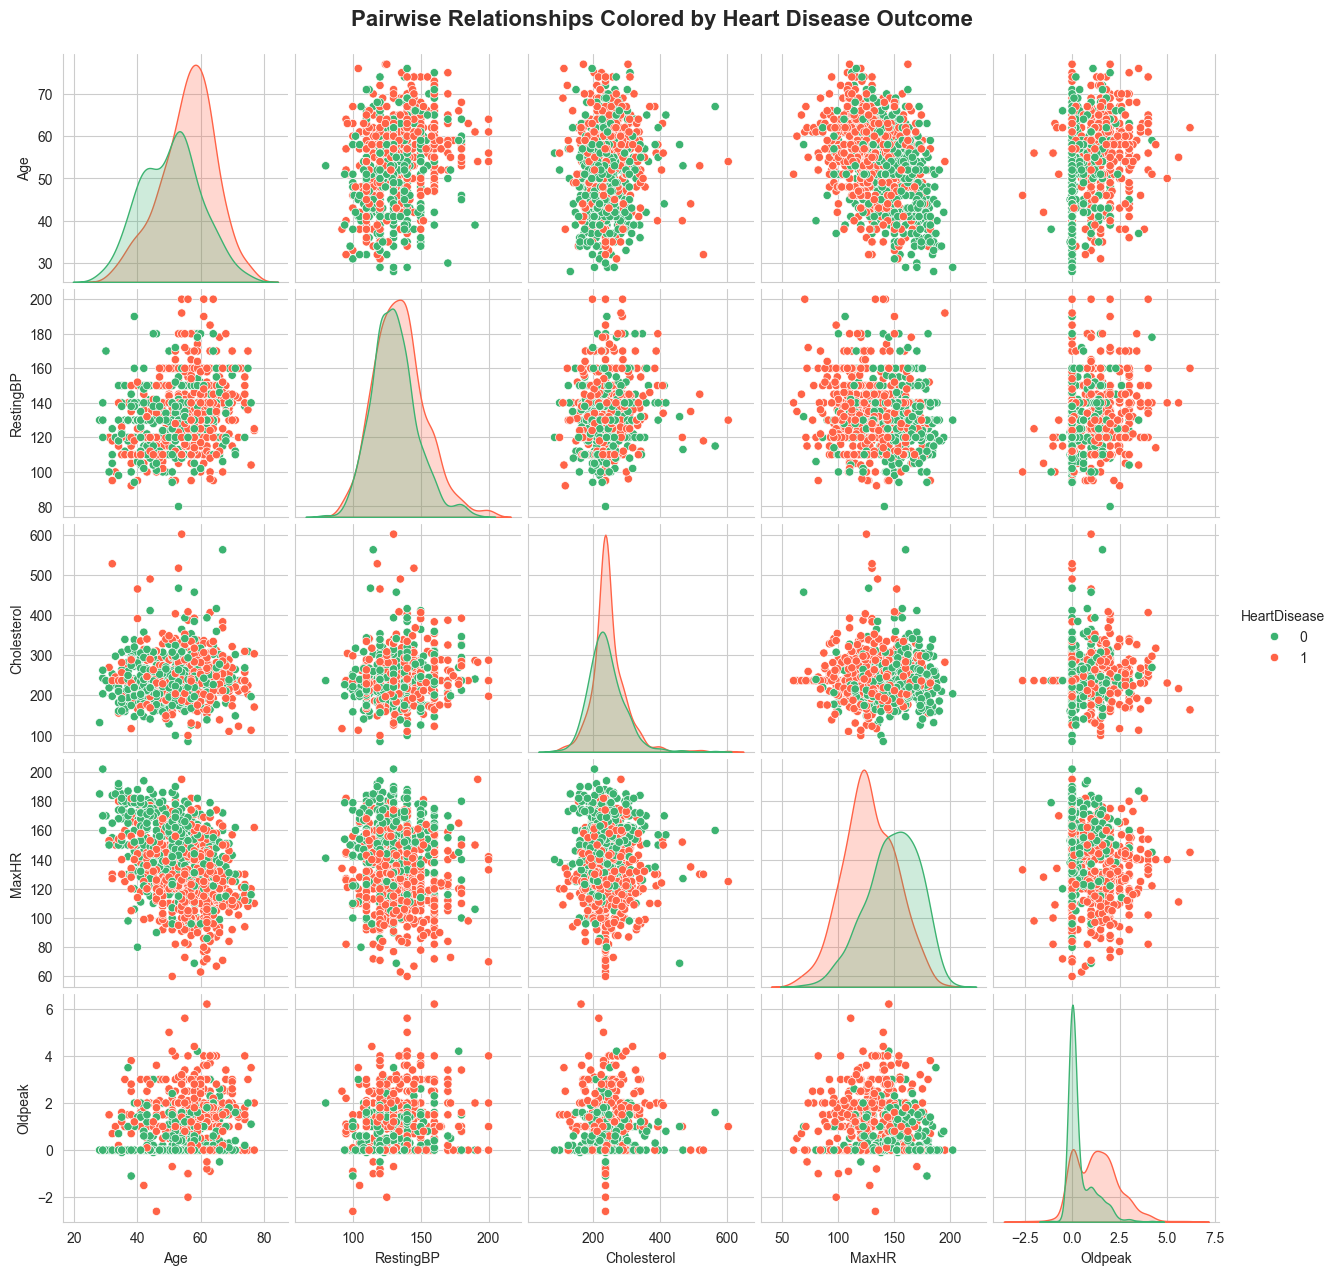

In [27]:
features_for_pairplot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
df_subset = df[features_for_pairplot]

# Create the Pair Plot
sns.pairplot(df_subset, hue='HeartDisease', palette=['#3CB371', '#FF6347'], diag_kind='kde'                
)

plt.suptitle("Pairwise Relationships Colored by Heart Disease Outcome", y=1.02, fontsize=16, fontweight='bold')
plt.savefig('plots/7_pairplot', dpi=300, bbox_inches='tight')
plt.show()

- We can see that dataset is not linearly separable based on any combination of these two-dimensional feature pairs.

- Evidence: Look at any of the scatter plots (the off-diagonal cells). In every plot, the red (disease) and green (no disease) dots are heavily intermingled. There is no single straight line you could draw on any of these 2D planes that would perfectly divide the red points from the green points.

- Implication: This means a simple linear model (like a basic perceptron or a linear SVM) relying on only two of these features will not be able to perfectly classify the patients.